# Importaciones

In [75]:
import numpy as np #PAra algebra lineal
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Graficar
import seaborn as sns #Visualizar datos
from collections import Counter

# Vamos a Escalar la data para pasarla al modelo
from sklearn.preprocessing import StandardScaler #Se usa para estandarizar datos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score

# DF original

In [76]:
df = pd.read_csv("weatherAUS.csv")

In [77]:
moda = df.mode().iloc[0]

# Reemplazar los valores NaN con la moda
df = df.fillna(moda)

# Mostrar el DataFrame actualizado
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.0,0.0,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [78]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

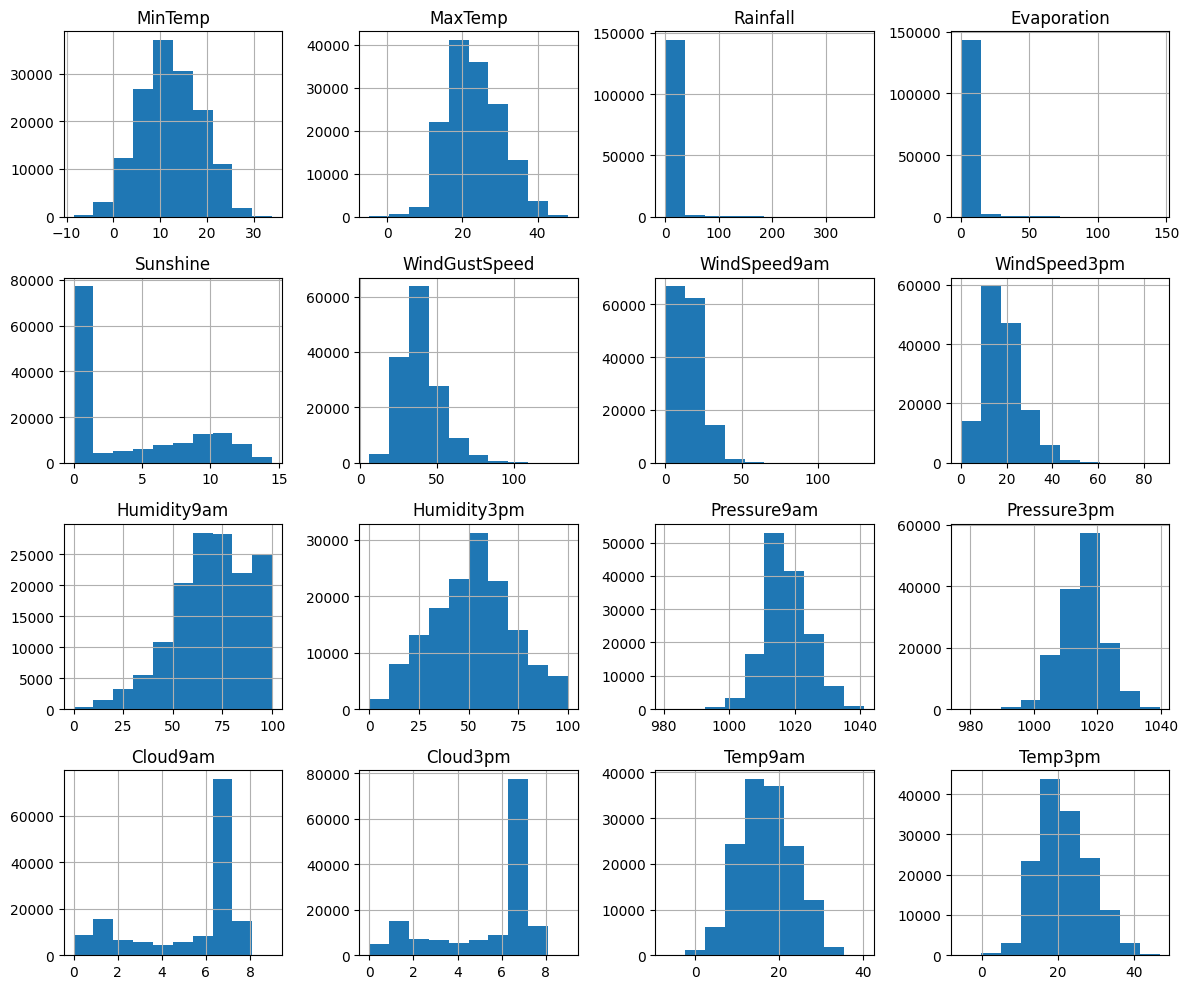

In [80]:
# Histogramas de las variables numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


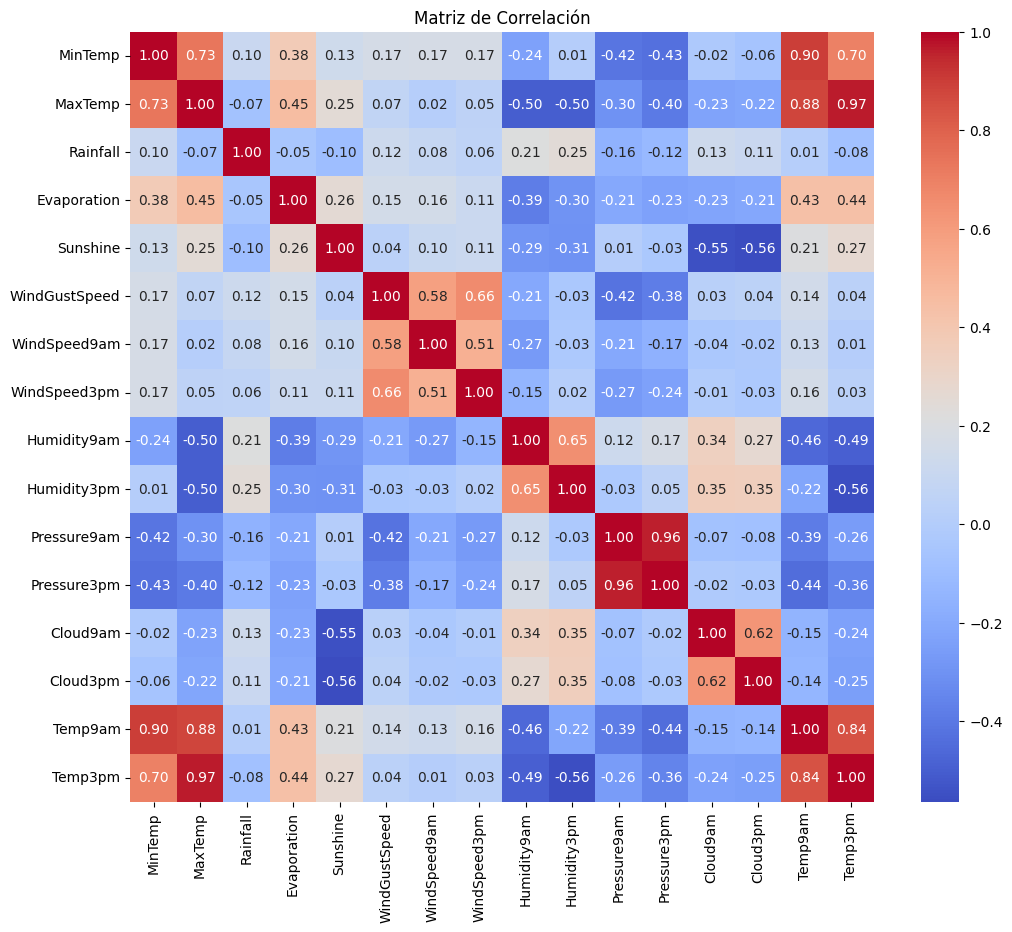

In [81]:
# Matriz de correlación entre variables numéricas
corr_matrix = df[num_cols].corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


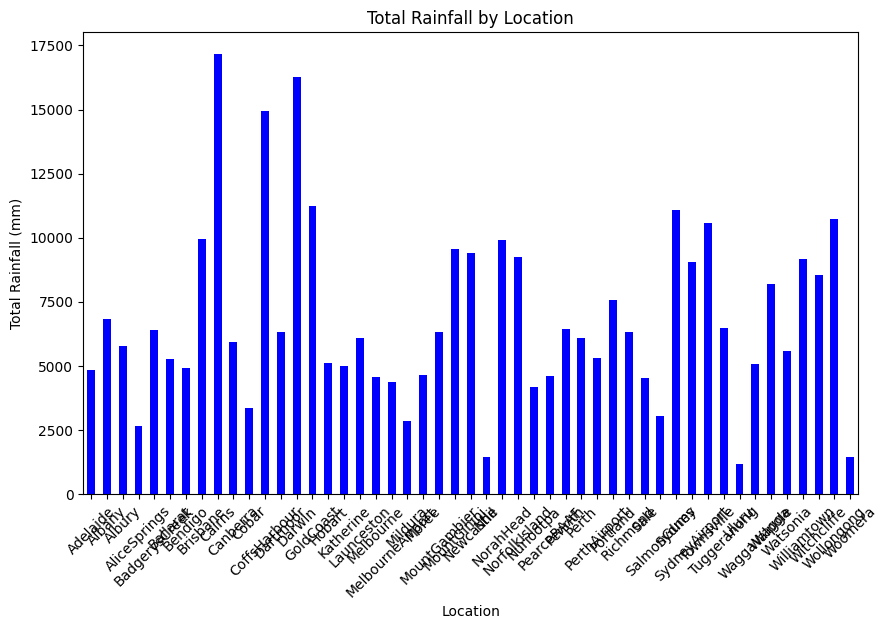

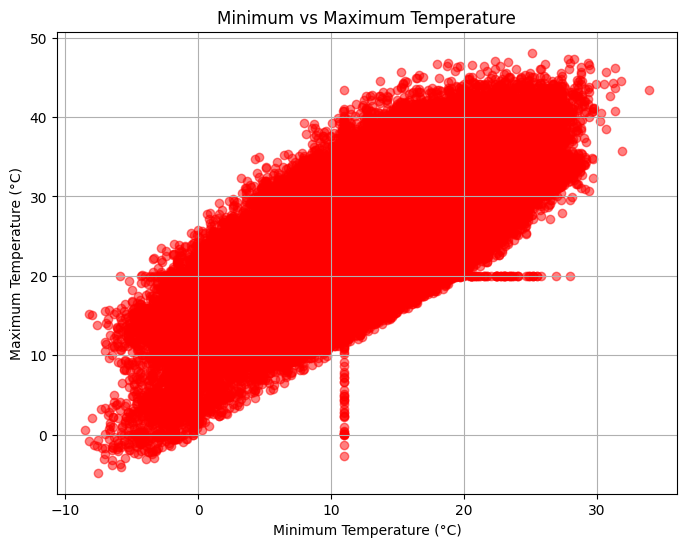

<Figure size 1000x600 with 0 Axes>

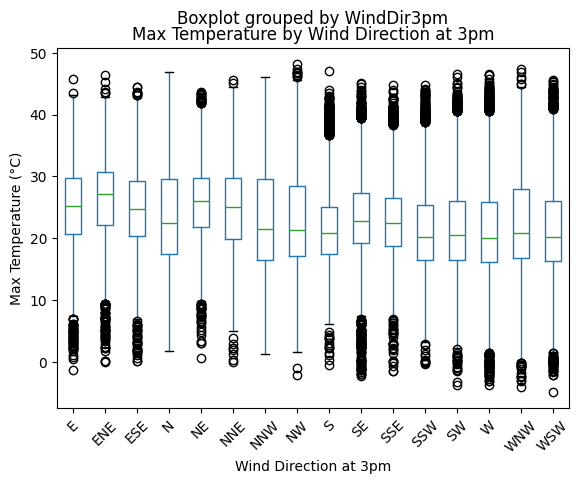

In [82]:
# Gráfico de barras de la cantidad de lluvia por ubicación
plt.figure(figsize=(10, 6))
df.groupby('Location')['Rainfall'].sum().plot(kind='bar', color='blue')
plt.title('Total Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de dispersión de la temperatura mínima vs. la temperatura máxima
plt.figure(figsize=(8, 6))
plt.scatter(df['MinTemp'], df['MaxTemp'], color='red', alpha=0.5)
plt.title('Minimum vs Maximum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Maximum Temperature (°C)')
plt.grid(True)
plt.show()

# Gráfico de caja y bigote de la temperatura máxima por dirección del viento en la tarde
plt.figure(figsize=(10, 6))
df.boxplot(column='MaxTemp', by='WindDir3pm', grid=False)
plt.title('Max Temperature by Wind Direction at 3pm')
plt.xlabel('Wind Direction at 3pm')
plt.ylabel('Max Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

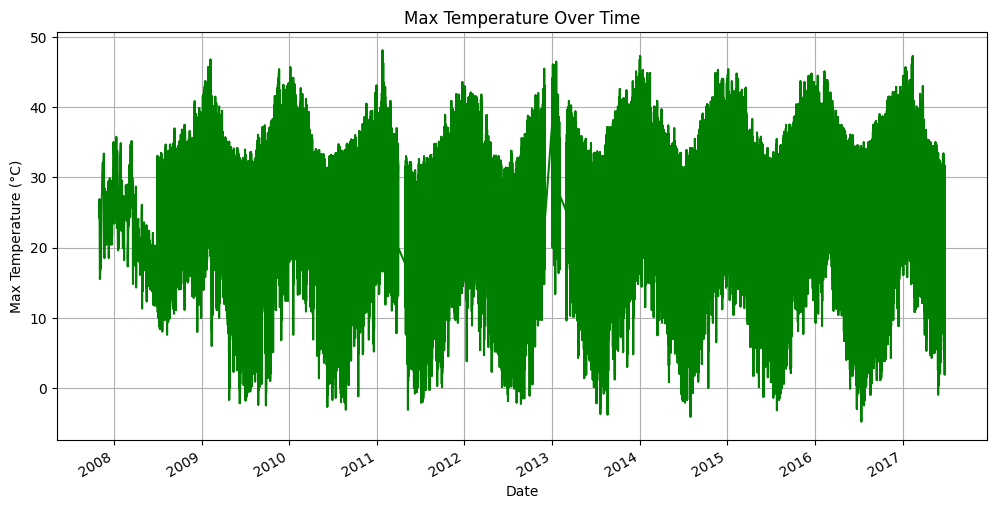

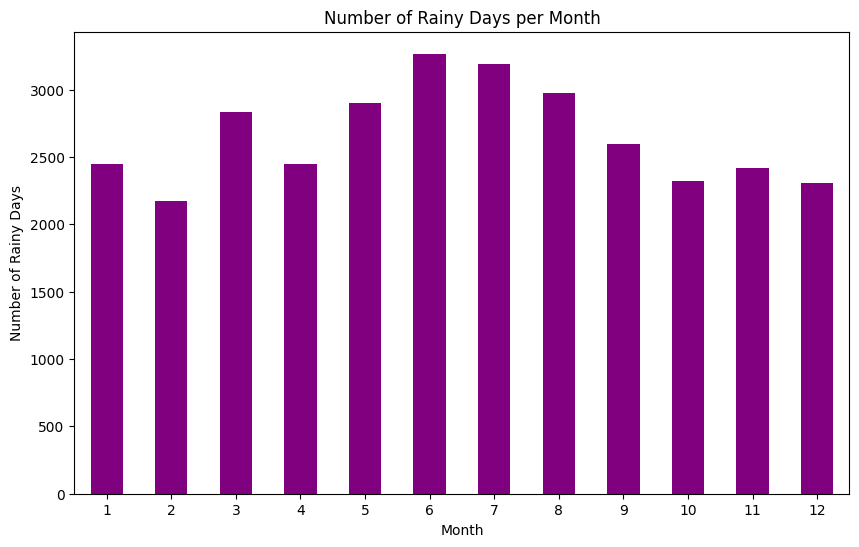

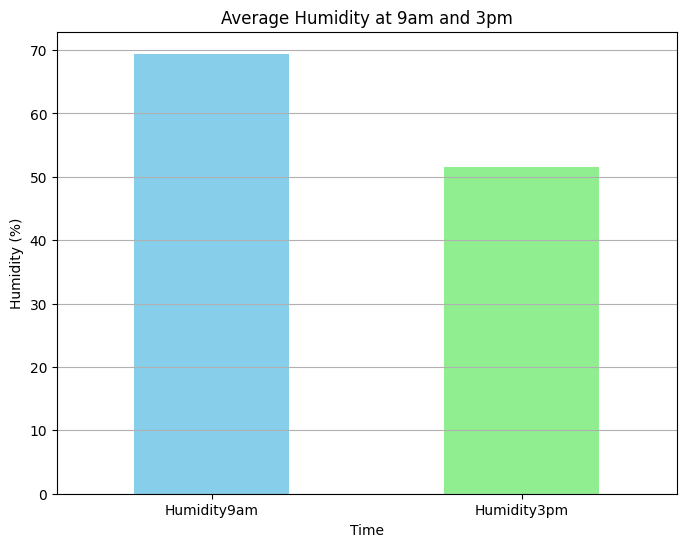

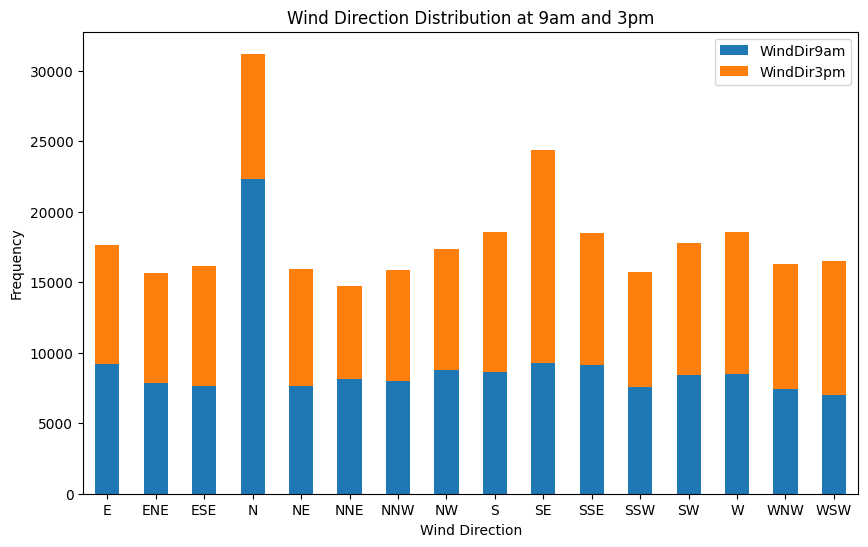

In [83]:
# Gráfico de líneas de la evolución de la temperatura máxima a lo largo del tiempo
plt.figure(figsize=(12, 6))
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['MaxTemp'].plot(color='green')
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
plt.show()

# Gráfico de barras de la cantidad de días lluviosos en cada mes
df['Month'] = df.index.month
rainy_days = df[df['RainToday'] == 'Yes']
rainy_days_per_month = rainy_days.groupby('Month').size()
plt.figure(figsize=(10, 6))
rainy_days_per_month.plot(kind='bar', color='purple')
plt.title('Number of Rainy Days per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.xticks(rotation=0)
plt.show()

# Gráfico de barras de la humedad a las 9am y 3pm
humidities = df[['Humidity9am', 'Humidity3pm']].mean()

plt.figure(figsize=(8, 6))
humidities.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Average Humidity at 9am and 3pm')
plt.xlabel('Time')
plt.ylabel('Humidity (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Gráfico de barras apiladas de la dirección del viento a las 9am y 3pm
wind_directions = df[['WindDir9am', 'WindDir3pm']]
wind_directions_stacked = wind_directions.apply(pd.Series.value_counts)
wind_directions_stacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Wind Direction Distribution at 9am and 3pm')
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


# Regresion Logistica

In [84]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
MinTemp,1.000000,0.732961,0.102541,0.375524,0.133447,0.168909,0.173978,0.172328,-0.236786,0.006028,-0.415683,-0.433275,-0.022351,-0.058914,0.897491,0.697183,-0.202359
MaxTemp,0.732961,1.000000,-0.073101,0.450922,0.249631,0.068833,0.015205,0.051603,-0.500793,-0.498555,-0.301611,-0.396341,-0.233586,-0.215961,0.878242,0.966991,-0.162377
Rainfall,0.102541,-0.073101,1.000000,-0.045246,-0.096489,0.123729,0.084717,0.055030,0.214883,0.247946,-0.158406,-0.119406,0.129984,0.105847,0.010895,-0.077572,-0.030713
Evaporation,0.375524,0.450922,-0.045246,1.000000,0.259017,0.152615,0.157012,0.109161,-0.385929,-0.298559,-0.209345,-0.234517,-0.226050,-0.211014,0.432746,0.437664,-0.018276
Sunshine,0.133447,0.249631,-0.096489,0.259017,1.000000,0.036587,0.096080,0.111435,-0.294106,-0.305477,0.006132,-0.032782,-0.549063,-0.563788,0.207418,0.269773,0.009569
WindGustSpeed,0.168909,0.068833,0.123729,0.152615,0.036587,1.000000,0.582636,0.659799,-0.206697,-0.032429,-0.421333,-0.383881,0.025682,0.041236,0.144893,0.035239,0.058645
WindSpeed9am,0.173978,0.015205,0.084717,0.157012,0.096080,0.582636,1.000000,0.514692,-0.265473,-0.031515,-0.208292,-0.165333,-0.038295,-0.023841,0.127239,0.006003,0.050886
WindSpeed3pm,0.172328,0.051603,0.055030,0.109161,0.111435,0.659799,0.514692,1.000000,-0.147016,0.015808,-0.267291,-0.239561,-0.005222,-0.031373,0.160402,0.029941,0.059035
Humidity9am,-0.236786,-0.500793,0.214883,-0.385929,-0.294106,-0.206697,-0.265473,-0.147016,1.000000,0.649412,0.123967,0.174235,0.335432,0.271343,-0.462451,-0.490513,-0.091193
Humidity3pm,0.006028,-0.498555,0.247946,-0.298559,-0.305477,-0.032429,-0.031515,0.015808,0.649412,1.000000,-0.027836,0.048684,0.353747,0.348955,-0.216813,-0.555336,-0.018597


In [85]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,No,12
2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,No,12
2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,No,12
2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,No,12
2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12


In [86]:
#Dividimos en input/output

X = df.drop('RainTomorrow', axis=1)
Y = df["RainTomorrow"]

X


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,4.0,0.0,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,No,12
2008-12-02,Albury,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,No,12
2008-12-03,Albury,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,No,12
2008-12-04,Albury,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,No,12
2008-12-05,Albury,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,4.0,0.0,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,No,6
2017-06-22,Uluru,3.6,25.3,0.0,4.0,0.0,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,No,6
2017-06-23,Uluru,5.4,26.9,0.0,4.0,0.0,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,No,6


In [87]:
# Aplicar codificación one-hot a las columnas no numéricas en X
X_encoded = pd.get_dummies(X)


In [88]:


#StandardScaler escala cada caracteristica de tal manera que tenga una media de 0 y una desviación estandar de 1
#Cada caracteristica tendra una distribución normal estandar.
# Escalar los datos codificados
scaler = StandardScaler()

#La estandarizacion nos sirve porque muchos modelos asumen que las caracteristicas estan centradas alrededor de 0.
#Si las caracteristicas tienen distintos rnagos , podria ser muy snesible para el algoritmo.


#Estandirazar los datos de X y los almacenare en una variable que se llame d_scaled. 
#Ajustar y transformar los datos de una vez
d_scaled = scaler.fit_transform(X_encoded)

# Crear un DataFrame a partir de los datos escalados
data_scaled1 = pd.DataFrame(d_scaled, columns=X_encoded.columns)
data_scaled1.head()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.191328,-0.041360,-0.203581,-0.257221,-0.845389,0.327736,0.677819,0.623294,0.081409,-1.443652,...,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,3.923226,-0.264604,0.529795,-0.529795
1,-0.751052,0.268745,-0.275097,-0.257221,-0.845389,0.327736,-1.124341,0.394836,-1.318948,-1.297105,...,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236,0.529795,-0.529795
2,0.112796,0.353318,-0.275097,-0.257221,-0.845389,0.479465,0.565184,0.851751,-1.630138,-1.052860,...,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,3.779236,0.529795,-0.529795
3,-0.468338,0.677518,-0.275097,-0.257221,-0.845389,-1.189550,-0.335896,-1.090136,-1.267083,-1.736746,...,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604,0.529795,-0.529795
4,0.835287,1.283631,-0.155903,-0.257221,-0.845389,0.100143,-0.786436,0.166379,0.651924,-0.906314,...,-0.270622,-0.339915,-0.262829,-0.243723,-0.262156,-0.273304,-0.254892,-0.264604,0.529795,-0.529795


In [89]:
#Divide los datos en conjunto de entrenamiento y Prueba

#d_scaled Es el DF con las caracteristicas ya normalizadas

#test_size - Le indicamos que queremos un 20% de los datos para testear

#Random_state - Nos garantiza que los mismo conjuntos de entrenamiento y testeo se generan en cada corrida

X_train, X_test, y_train, y_test = train_test_split(d_scaled, Y, test_size = 0.20, random_state = 42)

In [90]:
# C- controla la regularizacion del modelo, 
# Sirve para prevenir el sobreajuste del modelo al agregar una penalización a la magnitud de los coeficientes.

#Valores pequeños de C → mayor regularización.
#Valores grandes de C → menor regularización.

model = LogisticRegression(C = 0.1, max_iter = 500)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [91]:
X_test

array([[ 0.44262882, -0.60518576,  0.2255147 , ..., -0.26460377,
        -1.88752093,  1.88752093],
       [ 0.14420854,  0.50837057, -0.27509664, ..., -0.26460377,
         0.52979545, -0.52979545],
       [ 1.07088205,  0.81847486, -0.27509664, ..., -0.26460377,
         0.52979545, -0.52979545],
       ...,
       [ 0.36409717,  0.28284017, -0.27509664, ..., -0.26460377,
         0.52979545, -0.52979545],
       [ 0.08138322, -0.36555972, -0.1797421 , ...,  3.77923569,
         0.52979545, -0.52979545],
       [ 1.25935802,  0.45198797, -0.27509664, ..., -0.26460377,
         0.52979545, -0.52979545]])

In [92]:
y_pred

array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [93]:
predicted_proba = model.predict_proba(X_test)

positive_proba = predicted_proba[:, 1]
positive_proba

array([0.71436856, 0.0190783 , 0.2897861 , ..., 0.15973238, 0.27907703,
       0.13583276])

In [94]:
print('Weight Coefficient : ', model.coef_)
print('Bias : ', model.intercept_)
      

Weight Coefficient :  [[ 2.48944761e-01 -3.47694943e-01  8.24735856e-02 -1.94134546e-02
  -3.12068384e-01  6.89599160e-01 -4.67152039e-02 -1.83842576e-01
   4.24967953e-02  1.21447980e+00  8.64693264e-01 -1.23027867e+00
   9.54486660e-03  2.92945141e-01  7.16373066e-02  1.16898359e-01
   3.71775631e-02  7.12104813e-02  7.03762027e-02  1.98302515e-02
   2.87639257e-02 -3.23599886e-02 -8.01777169e-02 -2.16746899e-04
   1.03358033e-01  1.97671524e-02  1.76011736e-02  2.41107608e-02
  -1.76408345e-03  2.01625332e-02 -2.60702771e-02 -1.11052285e-01
  -3.00814230e-02 -9.30220986e-02 -8.64538979e-02 -1.82512665e-02
  -5.90085824e-03  6.04490617e-02  1.48689597e-02  5.72544714e-02
  -1.93811181e-01  2.12772809e-02 -4.91723443e-02 -1.44342072e-01
  -2.55490922e-02  5.40491563e-02  7.17589349e-02  1.39713044e-02
   1.43346529e-01  1.21952667e-01  4.11451395e-02 -3.49151853e-02
  -1.65237988e-02  2.49337551e-02  6.78940985e-02  3.48807934e-02
  -6.78388199e-02 -2.10184745e-02 -2.22022245e-02  9.0

# Resultado de la prediccion

In [95]:
print('Test accuracy: ', model.score(X_test, y_test))
print('Train accuracy: ', model.score(X_train, y_train))

Test accuracy:  0.8464526330262615
Train accuracy:  0.847827581465695


# Matriz de Confusion

In [96]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear DataFrame para la matriz de confusión con etiquetas relacionadas con RainTomorrow
df_confusion = pd.DataFrame(cm, columns=['Lluvia Predicha', 'Sin Lluvia Predicha'],
                            index=['Lluvia Real', 'Sin Lluvia Real'])

df_confusion

,Lluvia Predicha,Sin Lluvia Predicha
Lluvia Real,21507,1165
Sin Lluvia Real,3302,3118


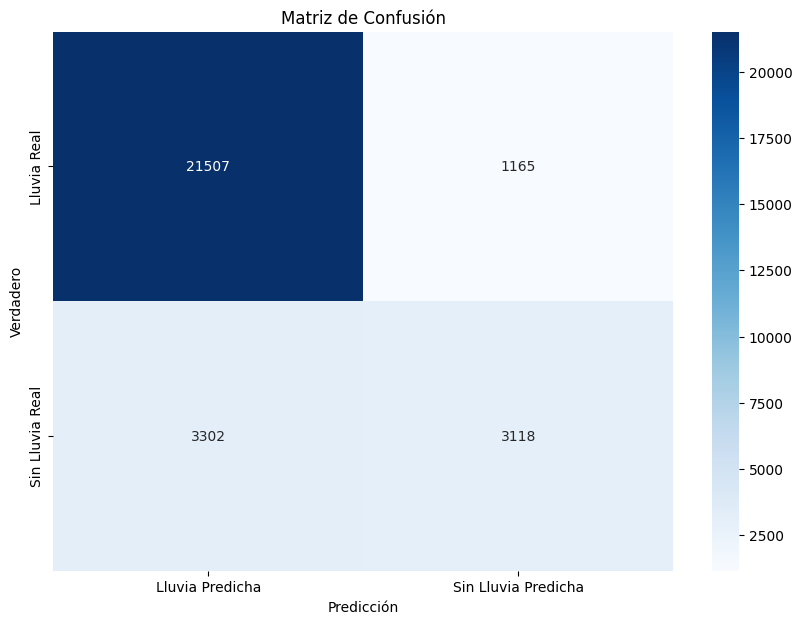

In [97]:
# Crear la figura y el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_confusion, annot=True, fmt="d", cmap="Blues")

# Añadir título y etiquetas
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicción')

# Mostrar el heatmap
plt.show()

In [98]:
print("Accuracy : ", accuracy_score(y_test, y_pred) )

Accuracy :  0.8464526330262615


In [99]:
# Suponiendo que has definido tu modelo como 'modelo'
model.feature_names_in_ = data_scaled1.columns.tolist()


final_prov = model.predict_proba(data_scaled1)

final_positiv_proba = final_prov[:,1]
final_positiv_proba

array([0.07256829, 0.06547013, 0.03459055, ..., 0.02445115, 0.00926991,
       0.04583922])

In [100]:
final_tags = model.predict(data_scaled1)
final_tags

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)